In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

SEED = 42

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2) ** 2)

*KNN in itself is not a model*
*It has to do with more of holding dataset and then using it to predict by finding k closest neighbor*

## Data

In [5]:
data = load_iris(return_X_y=True)
X, y = data

In [6]:
print(X.shape, y.shape)

(150, 4) (150,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((120, 4), (120,), (30, 4), (30,))

🤖

In [8]:
from collections import Counter

class KNN:
    """ KNN Algorithm class"""
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.y = y
        assert self.X.shape[0] == self.y.shape[0], "Not same size"
        print("Fitted")

    def _predict(self, x):
        # Distance between x and all examples in the training set
        distance = [euclidean_distance(x, X) for X in self.X]
        # Sort and return indices of the first k neighbors by distance
        k_idx = np.argsort(distance)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbors_label = [self.y[i] for i in k_idx]
        # collect the most common class label
        most_common = Counter(k_neighbors_label).most_common(1)
        return most_common[0][0]
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

In [9]:
knn = KNN()
knn.fit(X_train, y_train)

Fitted


In [10]:
y_pred_ = knn.predict(X_test)
y_pred_[0]

1

In [11]:
def accuracy(y_true, y_pred):
    assert y_true.shape == y_pred.shape, "Shape issue"
    return np.sum(y_true == y_pred) / len(y_true)

In [15]:
print(f"Accuracy: {(accuracy(y_test, y_pred_)) * 100}%")

Accuracy: 90.0%


## Plot

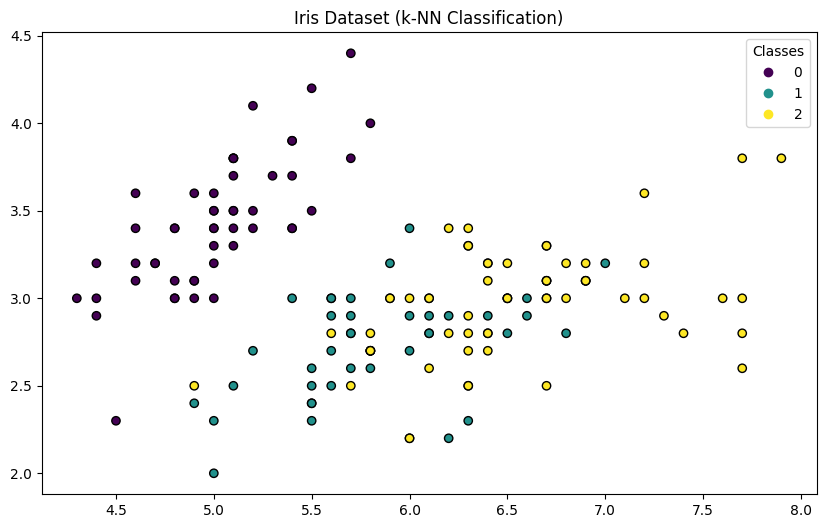

In [16]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
# Adding legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Iris Dataset (k-NN Classification)')
plt.show()


*Anyone who knows how to plot knn graph, please help through pull request 😓*